# Mutual information

### Cargar Datos

In [1]:
import pandas as pd
import numpy as np
sample_cod = pd.read_csv('dataset/data/sample_4M_cod.csv') 
sample_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 42 columns):
 #   Column                       Dtype
---  ------                       -----
 0   L4_SRC_PORT                  int64
 1   L4_DST_PORT                  int64
 2   PROTOCOL                     int64
 3   L7_PROTO                     int64
 4   IN_BYTES                     int64
 5   IN_PKTS                      int64
 6   OUT_BYTES                    int64
 7   OUT_PKTS                     int64
 8   TCP_FLAGS                    int64
 9   CLIENT_TCP_FLAGS             int64
 10  SERVER_TCP_FLAGS             int64
 11  FLOW_DURATION_MILLISECONDS   int64
 12  DURATION_IN                  int64
 13  DURATION_OUT                 int64
 14  MIN_TTL                      int64
 15  MAX_TTL                      int64
 16  LONGEST_FLOW_PKT             int64
 17  SHORTEST_FLOW_PKT            int64
 18  MIN_IP_PKT_LEN               int64
 19  MAX_IP_PKT_LEN               int64
 20  SR

### Info

In [4]:
sample_cod.nunique()

L4_SRC_PORT                    65536
L4_DST_PORT                    50638
PROTOCOL                           8
L7_PROTO                          91
IN_BYTES                       14884
IN_PKTS                         2734
OUT_BYTES                      34126
OUT_PKTS                        1565
TCP_FLAGS                         41
CLIENT_TCP_FLAGS                  39
SERVER_TCP_FLAGS                  39
FLOW_DURATION_MILLISECONDS      2629
DURATION_IN                     2578
DURATION_OUT                    1556
MIN_TTL                          162
MAX_TTL                          153
LONGEST_FLOW_PKT                1590
SHORTEST_FLOW_PKT                454
MIN_IP_PKT_LEN                   108
MAX_IP_PKT_LEN                  1590
SRC_TO_DST_SECOND_BYTES        21543
DST_TO_SRC_SECOND_BYTES        39494
RETRANSMITTED_IN_BYTES          2578
RETRANSMITTED_IN_PKTS            258
RETRANSMITTED_OUT_BYTES         4473
RETRANSMITTED_OUT_PKTS           416
SRC_TO_DST_AVG_THROUGHPUT       9650
D

In [5]:
sample_cod.keys()

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'AttackCod'],
      dtype='object')

### Funcion de calculo MI scores para caracteristicas discretas

In [2]:
from sklearn.feature_selection import mutual_info_regression

X = sample_cod.copy()
y = X.pop("AttackCod")

# Todas las funciones discretas ahora deberían tener tipos de números enteros 
discrete_features = X.dtypes == int

def mutual_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

### Calculo de mutual information

In [3]:
scores_mi = mutual_scores(X, y, discrete_features)
scores_mi[::3]
print(scores_mi)

MAX_IP_PKT_LEN                 0.648291
LONGEST_FLOW_PKT               0.647855
SRC_TO_DST_SECOND_BYTES        0.639269
IN_BYTES                       0.626697
SRC_TO_DST_AVG_THROUGHPUT      0.607991
MIN_TTL                        0.583756
MAX_TTL                        0.583093
L7_PROTO                       0.563742
FLOW_DURATION_MILLISECONDS     0.552098
DURATION_IN                    0.544216
L4_DST_PORT                    0.536097
SHORTEST_FLOW_PKT              0.523291
DST_TO_SRC_SECOND_BYTES        0.422649
OUT_BYTES                      0.421179
IN_PKTS                        0.410412
DST_TO_SRC_AVG_THROUGHPUT      0.398370
OUT_PKTS                       0.313489
MIN_IP_PKT_LEN                 0.292300
TCP_WIN_MAX_IN                 0.275933
NUM_PKTS_UP_TO_128_BYTES       0.237773
TCP_FLAGS                      0.218015
CLIENT_TCP_FLAGS               0.211023
TCP_WIN_MAX_OUT                0.183666
L4_SRC_PORT                    0.169148
NUM_PKTS_128_TO_256_BYTES      0.134655


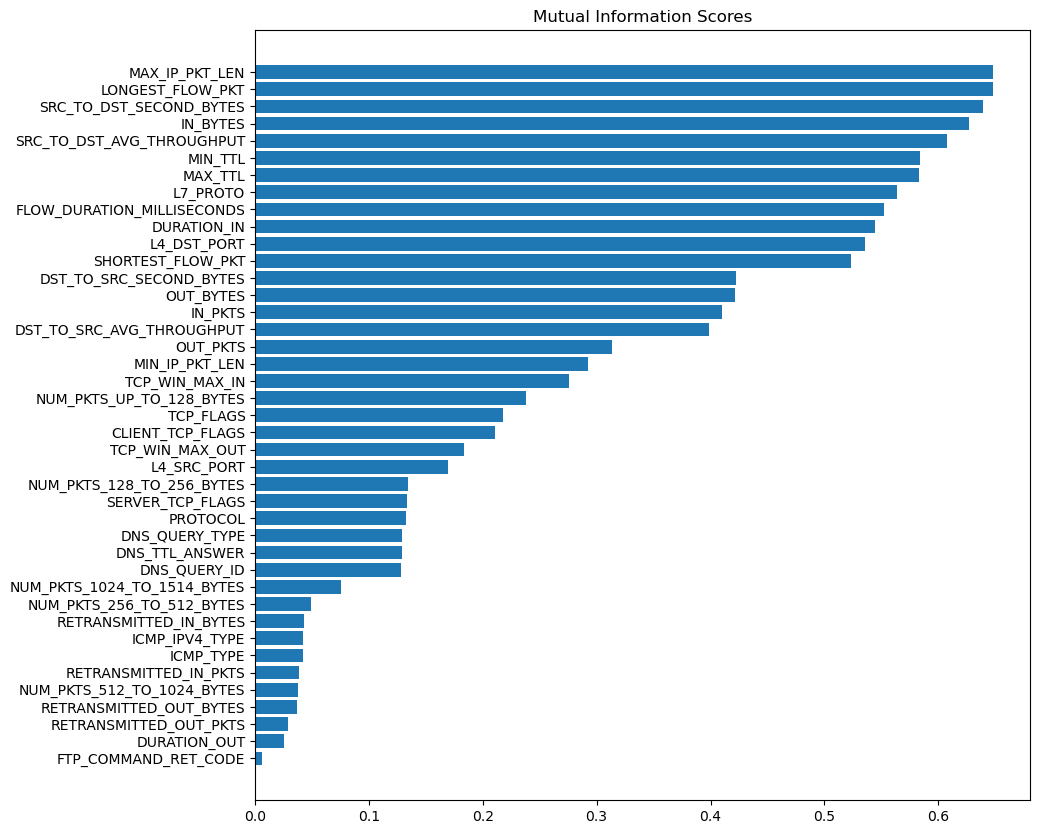

In [5]:
import matplotlib.pyplot as plt

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(10, 10))
plot_mi_scores(scores_mi)